In [2]:
import datetime
import yfinance as yf
import statsmodels.tsa.stattools as sm
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
stock = 'aapl'
train_start = '2020-01-01'
train_end = pd.Timestamp('2023-10-31', tz='America/New_York')
sim_start = '2023-10-30'
sim_end = pd.Timestamp('2023-12-31', tz='America/New_York')
scen_size = 10000

In [4]:
ticker = yf.Ticker(stock)

In [47]:
train_set = ticker.history(start=train_start, end=train_end)['Close']
test_set = ticker.history(start=sim_start, end=sim_end)['Close']

In [48]:
s0 = train_set.iloc[-1]
dt = 1
T = len(test_set)
N = T / dt

In [49]:
daily_returns = ((train_set / train_set.shift(1)) - 1)[1:]
mu = np.mean(daily_returns)
sigma = np.std(daily_returns)
drift = mu - 0.5 * sigma ** 2

In [203]:
sim = []
for _ in range(scen_size):
    S = [s0]
    for t in range(int(N)):
        rand_var = np.random.normal(0,1)
        new_s = S[-1] * np.exp(drift + sigma * rand_var)
        S.append(new_s)
    S = S[:len(S) - 1]
    S = pd.Series(S, index=test_set.index)
    sim.append(S)

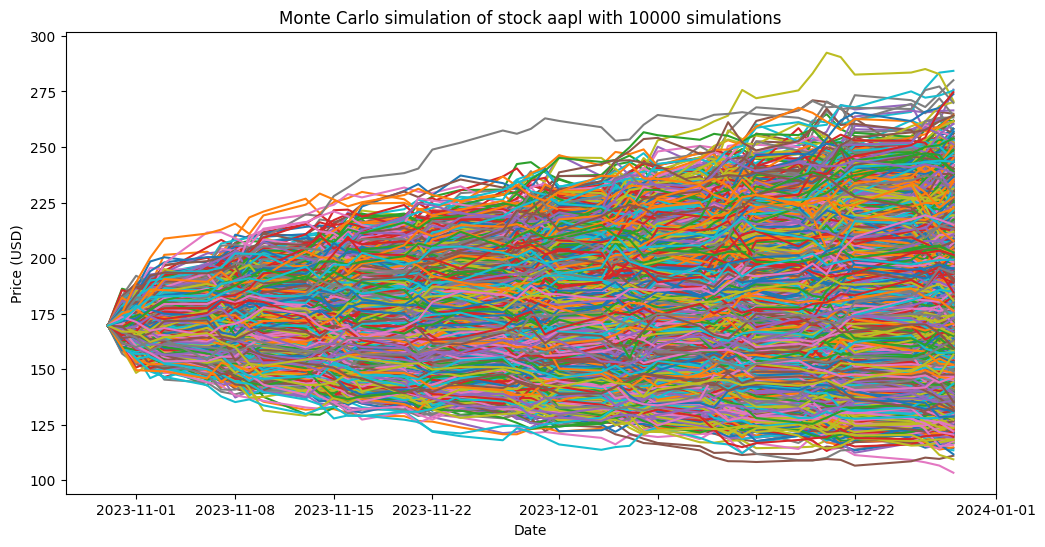

In [205]:
plt.figure(figsize=(12,6))
plt.title('Monte Carlo simulation of stock ' + stock + ' with ' + str(scen_size) + ' simulations')
plt.ylabel('Price (USD)')
plt.xlabel('Date')
for i in range(scen_size):
    plt.plot(sim[i])

In [223]:
maxes = []
mins = []
avg = []
std = []
for i in range(int(N)):
    daylist = []
    for j in range(scen_size):
        daylist.append(sim[j].iloc[i])
    maxes.append(max(daylist))
    mins.append(min(daylist))
    avg.append(np.mean(daylist))
    std.append(np.std(daylist))


In [230]:
final_df = pd.DataFrame()
final_df['real'] = test_set
final_df['avg'] = avg
final_df['standard deviation'] = std
final_df['expected'] = np.array(maxes) * 0.5 + np.array(mins) * 0.5


In [231]:
final_df

,real,avg,standard deviation,expected
Date,,,,
2023-10-30 00:00:00-04:00,169.619141,169.619141,0.000000,169.619141
2023-10-31 00:00:00-04:00,170.097260,169.806601,3.633605,171.607781
2023-11-01 00:00:00-04:00,173.284653,169.949771,5.145397,170.186843
2023-11-02 00:00:00-04:00,176.870468,170.122628,6.333534,173.072853
2023-11-03 00:00:00-04:00,175.954071,170.327554,7.288609,177.038017
2023-11-06 00:00:00-05:00,178.523926,170.515503,8.157949,177.092635
2023-11-07 00:00:00-05:00,181.103729,170.733838,8.900935,175.273517
2023-11-08 00:00:00-05:00,182.169510,170.957659,9.623791,175.381931
2023-11-09 00:00:00-05:00,181.691391,171.122766,10.314635,177.359618


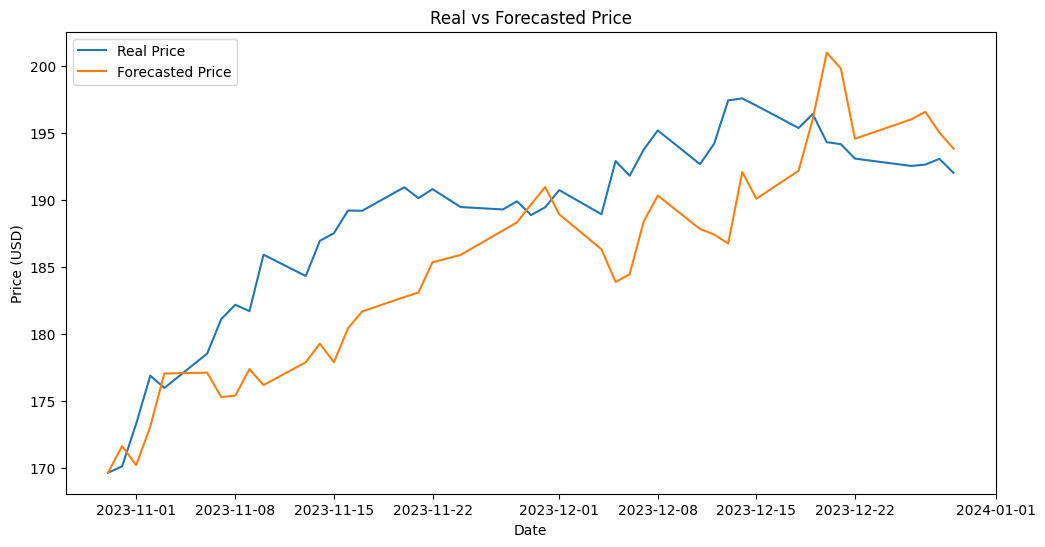

In [235]:
plt.figure(figsize=(12,6))
plt.plot(final_df['real'])
plt.plot(final_df['expected'])
plt.legend(['Real Price', 'Forecasted Price'])
plt.title('Real vs Forecasted Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()